
# 3i005 - 
# Projet 3: Analyse de séquences génomique
#### Compte-rendu de Tingting LI (non inscrite à 3I019)

In [1]:
# code fourni
import Projet_Bioinfo 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
%matplotlib inline


In [2]:
%reload_ext autoreload
%autoreload 2
# code contient le code que j'ai écrit 
import code           

## PARTIE 1 : Introduction

Les résultats présentées dans la suite de ce rapport ont été calculées avec le code écrit dans le fichier code.py, implémentant les fonctions demandées dans ce projet. Dans ce rendu, il y a les testes des fonctions écrites et les réponses aux questions dans l'ordre du projet.

## PARTIE 2 :Préliminaires : données et lecture des fichiers

**Question 1 :** 


In [3]:
#les fichiers doivent se trouver dans le même repertoire !!
dic =  Projet_Bioinfo.read_fasta("yeast_s_cerevisae_genomic_chr1-4.fna")  
j = 0
total = 0
for i in dic:
    res = sum(Projet_Bioinfo.nucleotide_count(dic.get(i)))
    total += res  
    print("Le chromosome "+str(j)+" de s. cerevisae contient : " + str(res)+" nucléotides.")
    j+=1
print("")
print("Le fichier yeast_s_cerevisae_genomic_chr1-4.fna contient en tout "+ str(total) +" nucléotides.")
    

Le chromosome 0 de s. cerevisae contient : 200487 nucléotides.
Le chromosome 1 de s. cerevisae contient : 713664 nucléotides.
Le chromosome 2 de s. cerevisae contient : 275706 nucléotides.
Le chromosome 3 de s. cerevisae contient : 1325996 nucléotides.

Le fichier yeast_s_cerevisae_genomic_chr1-4.fna contient en tout 2515853 nucléotides.


**Question 2 :** 


In [4]:
liste_entier = []
for i in dic:
    liste_entier += dic[i]

freq = Projet_Bioinfo.nucleotide_frequency( liste_entier )
print("Les fréquences des nucléotides du fichier yeast_s_cerevisae_genomic_chr1-4.fna : ")
print("A = {} ; C : {} ; G : {} ; T : {}".format(freq[0], freq[1], freq[2], freq[3]))


Les fréquences des nucléotides du fichier yeast_s_cerevisae_genomic_chr1-4.fna : 
A = 0.29983548323371834 ; C : 0.2011019721740499 ; G : 0.19999697915577738 ; T : 0.29906556543645435


**Question 3 et Question 4 :**
Test de logproba(liste_entiers, m) et logprobafast(list_nucleo_count, m)

In [5]:
print("CAT avec logproba : " + str(code.logproba([1,0,3], (0.2,0.3,0.1,0.4))))
print("CAT avec logprobafast : " + str(code.logprobafast(Projet_Bioinfo.nucleotide_count([1,0,3]), (0.2,0.3,0.1,0.4))))


CAT avec logproba : -3.7297014486341915
CAT avec logprobafast : -3.7297014486341915


## PARTIE 3 : Annotation des régions promoteurs
### 3.1 Description Empirique, préliminaires

**Question 1 :**
Teste de code(m, k), decode(i,k) et comptage_observe(k, seq, possibles)

In [6]:
print("1) Code de 'TAC'=[3, 0, 1] : " + str(code.code(Projet_Bioinfo.encode_sequence("TAC"), 3)))
print("2) Decode de 49 : " + str(code.decode(49,3)))
print("3) Comptage observé de 'ATCAT' : " )
print(code.comptage_observe(2, [0,3,1,0,3], code.mots_possibles(2)))

1) Code de 'TAC'=[3, 0, 1] : 49
2) Decode de 49 : [3, 0, 1]
3) Comptage observé de 'ATCAT' : 
{0: 0, 1: 0, 2: 0, 3: 2, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 1, 14: 0, 15: 0}


**Question 2 :** 
<br>Soit un mot $w = w_0w_1...w_{k-1}$ de longueur k  et soit une séquence S aléatoire de longueur l, $S = S_0S_1...S_{l-1}$. Les variables aléatoire $S_0, ..., S_{l-1}$ correspondent à une lettre, et sont donc indépendantes et identiquement distribuées. </br>
<br> Soit $X_i$ une variable aléatoire suivant la loi de Bernoulli. Sa probabilité de réussite correspond à au probabilité que le mot $w$ apparait dans S à la case i. On remarque que cela est possible que si $i+k-1 ≤ l-1$ donc $i ≤ l-k$</br>.
<br>Comme les variables $S_i$ sont indépendantes, on a : $P(X_i=1)=P(S_i=w_1)...P(S_{i+k-1}=w_{k-1})$</br>
<br> </br>


In [7]:
print("Le proba pour d'apparition attendu pour les mots de longueur 2")
code.comptage_attendu(2, code.mots_possibles(2),freq,100)


Le proba pour d'apparition attendu pour les mots de longueur 2


{0: 8.99013170059974,
 1: 6.029750700606003,
 2: 5.996619089045641,
 3: 8.967046833120449,
 4: 6.029750700606003,
 5: 4.044200321229234,
 6: 4.021978693707918,
 7: 6.014267501861834,
 8: 5.996619089045641,
 9: 4.021978693707918,
 10: 3.9998791671436456,
 11: 5.981220965680533,
 12: 8.967046833120449,
 13: 6.014267501861834,
 14: 5.981220965680533,
 15: 8.944021242982616}

**Question 3:**
<br>Dans la suite, on a les traces des graphes : nombre attendu d'occurrence sur l'abcisses et nombre observé sur l'ordonnées pour les mots de longueur k= 2, 4, 6, 8.</br>
<br>On remarque que il u y a un écart important entre le nombre d'occurrence attendu et observé, on peut observer ce écart grâce à la distance des nuages de point et la droite $x=y$ tracée en orange. En augmentant la longueur, l'écart est légerment plus grand. Donc cette modélisation de l'observation des occurrences n'est pas correcte, certains mots sont plus fréquents que d'autres et cela ne peut pas être expliqué par les fréquences de leurs lettres. </br>

In [8]:
# Création des listes des séquences de nucléotides PHO, GAL et MET :
pho = Projet_Bioinfo.read_fasta("regulatory_seq_PHO.fasta" )
gal = Projet_Bioinfo.read_fasta("regulatory_seqs_GAL.fasta")
met = Projet_Bioinfo.read_fasta("regulatory_seqs_MET.fasta")

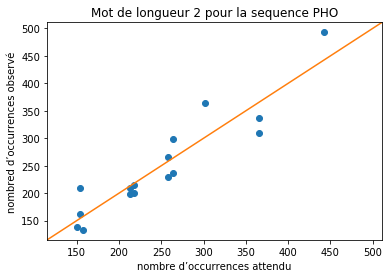

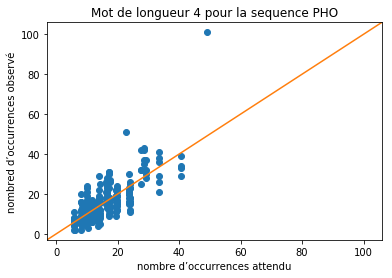

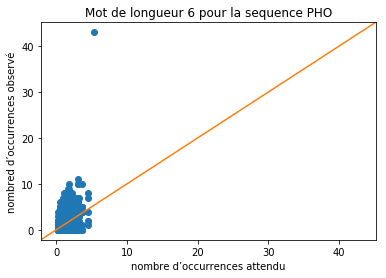

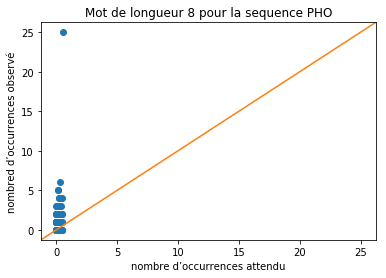

In [9]:
for k in [2, 4, 6, 8]:
    code.graphe_attendu_observe("PHO", pho, k)

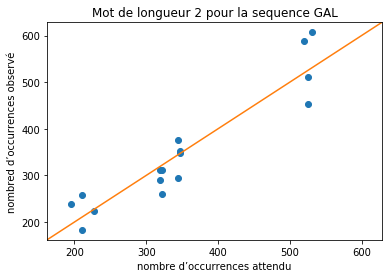

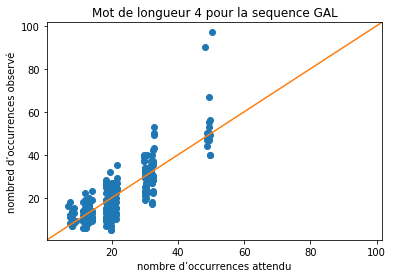

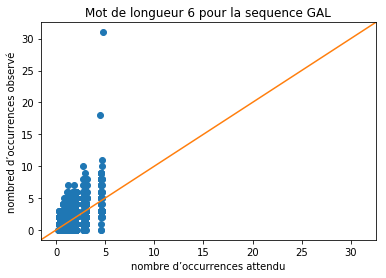

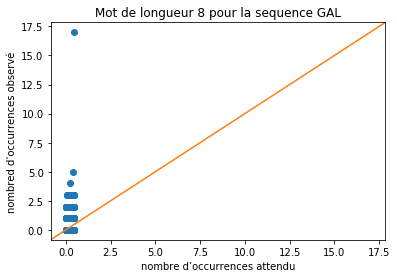

In [10]:
for k in [2, 4, 6, 8]:
    code.graphe_attendu_observe("GAL", gal, k)

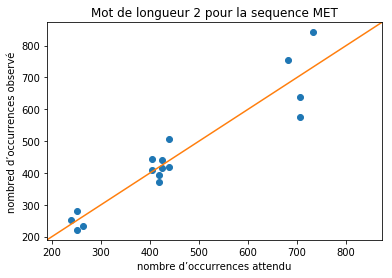

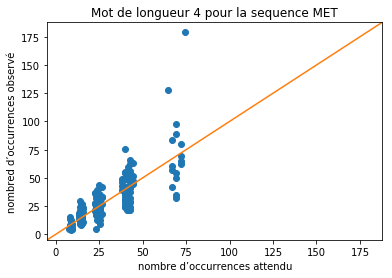

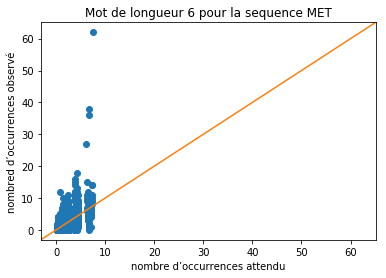

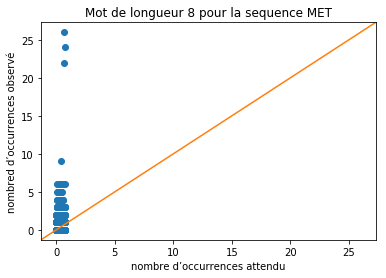

In [11]:
for k in [2, 4, 6, 8]:
    code.graphe_attendu_observe("MET", met, k)

### 3.2 Simulation de séquences aléatoires

**Question 1 :** Teste pour simule_sequence(lg, m)

In [12]:
test_liste = []
test_liste = list(code.simule_sequence(10000, freq))
#print(test_liste)

**Question 2 :** 
On réalise le graphe de comparaison pour une séquence de longueur 10000 et des mots de taille 4.

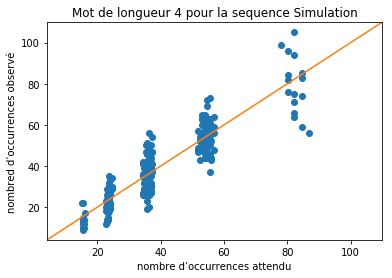

In [13]:
code.graphe_attendu_observe("Simulation", test_liste, 4)

**Question 3 :**
<br>Teste de proba_empirique(mot, lg, m, N).</br>
<br>Cette fonction prend en argument un mot ( sous forme de liste d'entier), lg la fréquence de la séquence à simuler, m une liste de 4 entiers représentant les fréquences d'apparition de chaque lettre ( on utilise la fréquence observée pour s. cerevisae)et N le nombre de simulation qu'on va faire.

In [14]:
proba = dict()
for mot in ["ATCTGC", "ATATAT", "TTTAAA", "AAAAAA"]:
    print("Pour le mot "+ mot + ", on a : ")
    mot_chiffre = Projet_Bioinfo.encode_sequence(mot)
    proba[mot] = code.proba_empirique(mot_chiffre, 10000, freq, 100 )
    print(proba[mot])

Pour le mot ATCTGC, on a : 
{1: 0.18, 2: 0.27, 0: 0.18, 3: 0.21, 4: 0.11, 5: 0.03, 6: 0.02}
Pour le mot ATATAT, on a : 
{13: 0.02, 8: 0.1, 5: 0.14, 4: 0.12, 6: 0.17, 11: 0.04, 7: 0.15, 9: 0.03, 15: 0.01, 3: 0.04, 14: 0.02, 10: 0.07, 12: 0.05, 1: 0.02, 2: 0.01, 16: 0.01}
Pour le mot TTTAAA, on a : 
{10: 0.08, 12: 0.04, 6: 0.15, 4: 0.08, 2: 0.03, 5: 0.13, 9: 0.13, 7: 0.11, 8: 0.13, 14: 0.02, 13: 0.05, 3: 0.05}
Pour le mot AAAAAA, on a : 
{3: 0.09, 14: 0.04, 8: 0.11, 6: 0.16, 10: 0.03, 5: 0.07, 4: 0.1, 11: 0.06, 9: 0.07, 12: 0.07, 7: 0.1, 13: 0.06, 0: 0.01, 16: 0.01, 1: 0.01, 15: 0.01}


**Question 4 :** 
<br>Histogrammes de la distribution du comptage pour les mots : "ATCTGC", "ATATAT", "TTTAAA" et "AAAAAA". Avec lg la longueur des séquences qui est égale à 10000 et en fesant 100 simulations</br>
<br>On remarque que les graphes obtenus sont différents selon les mots.  </br>
<br> De plus on observe que les graphes de "ATATAT" et "TTTAAA" sont assez proche.</br>

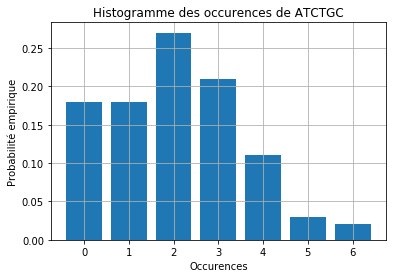

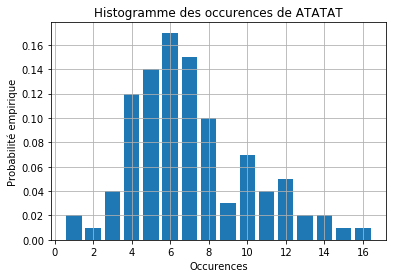

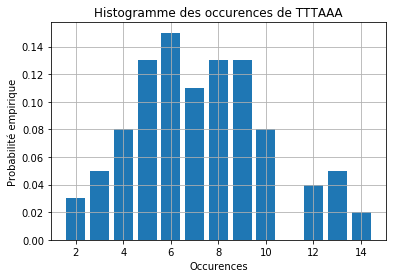

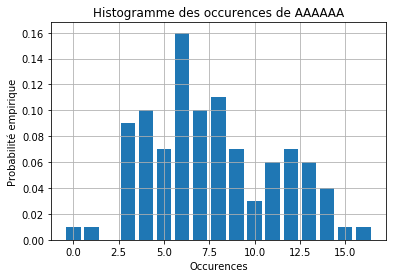

In [15]:
for mot in proba:
    fig, graphe = plt.subplots()
    
    graphe.bar(proba[mot].keys(), proba[mot].values())
    graphe.grid(True)
    graphe.set_title("Histogramme des occurences de " + mot)
    graphe.set_xlabel("Occurences")
    graphe.set_ylabel("Probabilité empirique")
    

**Question 5 :**
<br> Soient un mot $w$ et 2 entiers $n$ et $l$. Soit $X$ la variable aléatoire représentant le nombre d'occurrences de $w$ dans des séquences de longueur $l$. On suppose que $X$ suit une loi de Bernouilli qui vaut 1 si X=n et 0 sinon. On a donc l'intervalle de confiance suivante : 
$I = [p-t_α\sqrt{\frac{p(1-p)}{N}}; p+t_α\sqrt{\frac{p(1-p)}{N}}]$ avec p la valeur estimé de la probalilité de réussite de X. On calcule cette intervalle de confiance à 95% donc $t_α = 1,96$.</br>
<br>Ci-dessous on affiche l'intervalle de confiance pour cette probabilité empirique sur les histogrammes ci-dessus. L'intervalle de confiance est représenté par les traits rouge.</br>

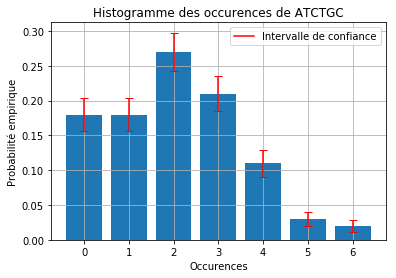

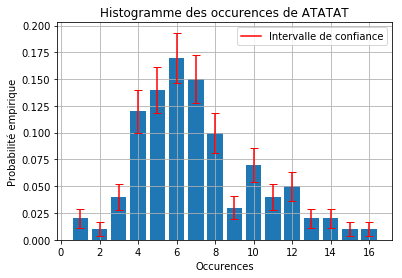

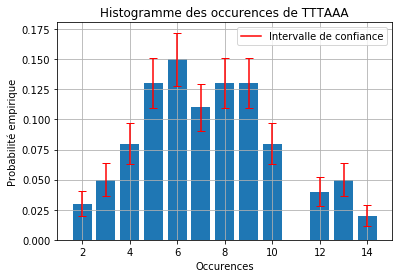

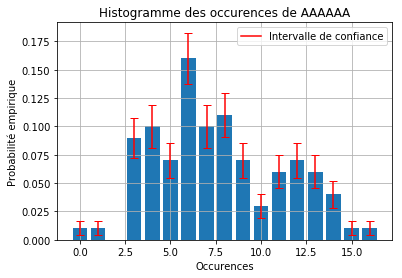

In [16]:
N = 1000 # nombre total de simulation qu'on a réalisé

for mot in proba:
    fig, graphe = plt.subplots()
    
    keys = np.array([x for x in proba[mot].keys()])
    values = np.array([x for x in proba[mot].values()])
    graphe.bar(keys, values, yerr = 1.96*np.sqrt(values*(1-values)/N), ecolor="RED", capsize=4)
    
    graphe.grid(True)
    graphe.set_title("Histogramme des occurences de " + mot)
    graphe.set_xlabel("Occurences")
    graphe.set_ylabel("Probabilité empirique")
    label_int = mlines.Line2D([],[],color="red", label="Intervalle de confiance")
    graphe.legend(handles=[label_int] ,loc= 'upper right')
    

### 3.3 Modèles de dinucléotides et trinucléotides

**Question 1 :**
<br> Ce modèle correspond à une chaîne de Markov d'ordre 1 : seul le nucléotide précédent est utilisé pour déterminer la loi du suivante. De plus les valeurs sont aussi strictement positive donc la chaîne est ergodique. Donc la probabilité stationnaire peut être estimée par la fréquence des lettres dans une séquence obtenue par l'utilisation de la chaîne de Markov. </br>

**Question 2 :**
On estime M avec la séquence de s. cerevisae.

In [17]:
M =  code.estimer_M(liste_entier)
print("Estimation de la matrice M = "),
print(M)

Estimation de la matrice M = 
[[0.3250462  0.18551797 0.20059204 0.28884379]
 [0.33570778 0.2092548  0.1575632  0.29747422]
 [0.31321125 0.20244971 0.20774423 0.27659481]
 [0.24149361 0.2103415  0.2227537  0.32541118]]


**Question 3 :**
On simule une séquence de longueur l avec le modéle de dinucléotique.

In [18]:
print(code.simule_sequence_markov(freq, M, 20))

[1, 3, 2, 0, 3, 3, 0, 3, 0, 2, 3, 0, 2, 2, 2, 3, 1, 2, 2, 0]


**Question 4 :**
Calcule la probabilité d'apparition d'un mot à une position donnée

In [19]:
print(code.proba_position(freq, M, [0,1]))

0.0556248715644356


**Question 5:**
<br>On écrit une fonction comptage_attendu_markov(k, possibles, freq, nb, M), qui est très similaire à comptage_attendu(k, possibles, freq, nb), mais on utilise la fonction proba_position(freq, M, mot) pour calculer la probabilité.</br>


In [20]:
print("Le proba pour d'apparition attendu pour les mots de longueur 2 par le modèle de chaîne de Markov :")
code.comptage_attendu_markov(2, code.mots_possibles(2), freq, 100, M)


Le proba pour d'apparition attendu pour les mots de longueur 2 par le modèle de chaîne de Markov :


{0: 9.746038421163718,
 1: 5.56248715644356,
 2: 6.014461099277263,
 3: 8.660561646487293,
 4: 6.751149610092481,
 5: 4.208155245954354,
 6: 3.1686271018219263,
 7: 5.982265259536228,
 8: 6.264130424601598,
 9: 4.04893300402321,
 10: 4.154821754062161,
 11: 5.531812732890769,
 12: 7.222242317019317,
 13: 6.290590109994502,
 14: 6.661796217823538,
 15: 9.731927898808078}

**Question 6 :**
<br>On compare les comptage du nombre d'occurrences entre le modèle de nucléotides et de dénucléotides sous forme d'un graphe de points (voir ci-dessous).</br>

<br> On remarque qu'il y a des différences : en utilisant le modèle de dénucléotides, les mots commes AA, CA, GA, TG ou TT sont plus fréquents. Les mots AC, AT, CG, GT ou TA sont moins frequents et AG, CC, CT, GC, GG et TC restent invariants. Malgrè celà les différenes sont assez petites, ce qui indique que ces 2 modélisations sont similaire.</br>


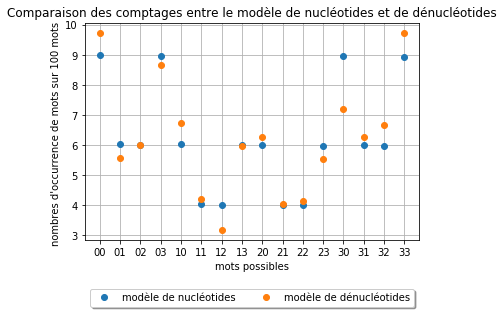

In [21]:
k = 2

graphe = plt.subplot()
nu = code.comptage_attendu(k, code.mots_possibles(k), freq, 100)
denu = code.comptage_attendu_markov(k, code.mots_possibles(k), freq, 100, M)

keys = list(nu.keys())
str_list=[]
for i in range(len(keys)):
    keys[i] = code.decode(keys[i], k)
    str_list.append( "".join(str(e) for e in keys[i]))  
    
graphe.plot(str_list, nu.values(),"o", label = "modèle de nucléotides")
graphe.plot(denu.keys(), denu.values(),"o", label = "modèle de dénucléotides")

graphe.set_xlabel("mots possibles")
graphe.set_ylabel("nombres d'occurrence de mots sur 100 mots ")
graphe.set_title("Comparaison des comptages entre le modèle de nucléotides et de dénucléotides")
box = graphe.get_position()
graphe.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),
          fancybox=True, shadow=True, ncol=5)
graphe.grid(True)

**Question 7 :**
<br>On retrace les graphes représentant les nombres d'occurrences observés et attendus par le modèle de denucléotides.</br>

<br> On observe que c'est similaire à ceux du modèle précedent.</br>

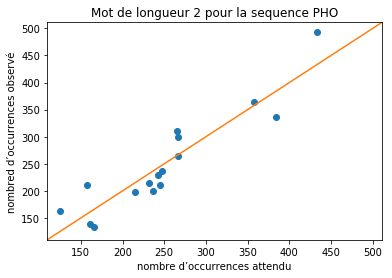

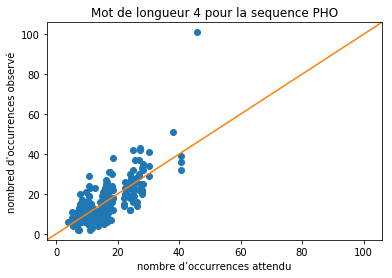

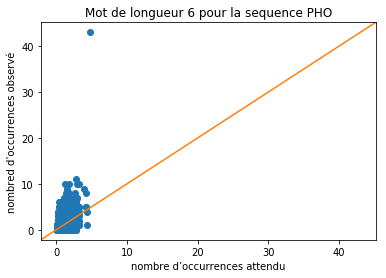

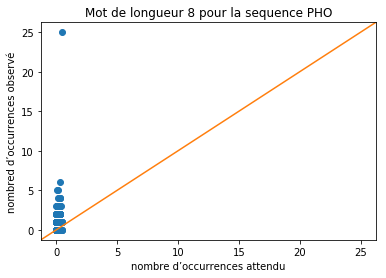

In [22]:
for k in [2, 4, 6, 8]:
    code.graphe_attendu_observe_markov("PHO", pho, k,M)

### 3.4 Probabilités de mots


**Question 1 :**
<br> Voir question 2 de la partie 3.1.</br>

**Question 2 :**
<br> Si l-k+1 est grand, on peut approcher la loi binomiale X par une loi de Poisson de paramètre $λ=(l-k+1)p$</br>

**Question 3 :**
<br> </br>

In [23]:
proba = dict()
for mot in ["ATCTGC", "ATATAT", "TTTAAA", "AAAAAA"]:
    print("Pour le mot "+ mot + ", on a : ")
    mot_chiffre = Projet_Bioinfo.encode_sequence(mot)
    proba[mot] = code.proba_empirique_markov(mot_chiffre, 10000, freq, 100,M )
    print(proba[mot])

Pour le mot ATCTGC, on a : 
{1: 0.24, 5: 0.09, 4: 0.14, 2: 0.22, 0: 0.06, 3: 0.22, 7: 0.02, 6: 0.01}
Pour le mot ATATAT, on a : 
{6: 0.14, 5: 0.24, 2: 0.12, 3: 0.12, 4: 0.14, 1: 0.08, 9: 0.03, 7: 0.07, 8: 0.04, 10: 0.01, 0: 0.01}
Pour le mot TTTAAA, on a : 
{7: 0.19, 6: 0.12, 9: 0.1, 10: 0.13, 13: 0.04, 8: 0.13, 4: 0.05, 2: 0.01, 12: 0.06, 5: 0.07, 11: 0.07, 3: 0.02, 16: 0.01}
Pour le mot AAAAAA, on a : 
{18: 0.03, 9: 0.05, 17: 0.05, 5: 0.07, 15: 0.11, 1: 0.01, 4: 0.06, 14: 0.08, 7: 0.08, 6: 0.08, 10: 0.06, 3: 0.02, 8: 0.06, 11: 0.05, 13: 0.07, 12: 0.04, 19: 0.01, 16: 0.03, 20: 0.02, 22: 0.01, 29: 0.01}


#### ( Je n'ai pas traité les questions 4 et 5. )